In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv("car_data.csv")

In [3]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [4]:
df.columns

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [5]:
df.describe

<bound method NDFrame.describe of      User ID  Gender  Age  AnnualSalary  Purchased
0        385    Male   35         20000          0
1        681    Male   40         43500          0
2        353    Male   49         74000          0
3        895    Male   40        107500          1
4        661    Male   25         79000          0
..       ...     ...  ...           ...        ...
995      863    Male   38         59000          0
996      800  Female   47         23500          0
997      407  Female   28        138500          1
998      299  Female   48        134000          1
999      687  Female   44         73500          0

[1000 rows x 5 columns]>

In [6]:
df.shape

(1000, 5)

In [8]:
gender = {'Male':0,'Female':1}

In [9]:
age_mean_male=np.mean(df[df['Gender']==0]['Age'].values)
age_mean_fmale=np.mean(df[df['Gender']==1]['Age'].values)

In [10]:
df["Gender"]=df["Gender"].map(gender)

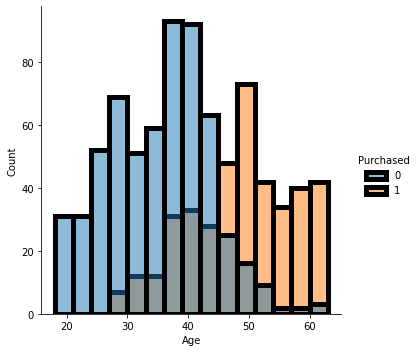

In [15]:
sns.displot(ax=ax, x=df['Age'],hue=df['Purchased'], linewidth=5)
ax.plot(age_mean_male,0,marker='o',markersize=5)
ax.plot(age_mean_fmale,0,marker='o',markersize=5)

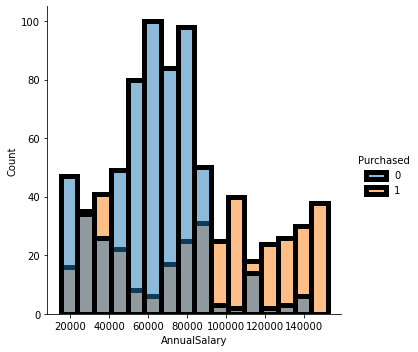

In [16]:
sal_mean_male=np.mean(df[df['Gender']==0]['AnnualSalary'].values)
sal_mean_fmale=np.mean(df[df['Gender']==1]['AnnualSalary'].values)
sns.displot(ax=ax, x=df['AnnualSalary'],hue=df['Purchased'], linewidth=5)
ax.plot(sal_mean_male,0,marker='o',markersize=10)
ax.plot(sal_mean_fmale,0,marker='o',markersize=10)

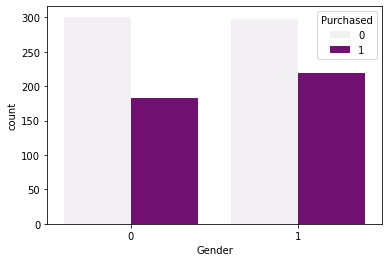

In [17]:
plt = sns.countplot(df['Gender'],hue=df['Purchased'], color = 'Purple')

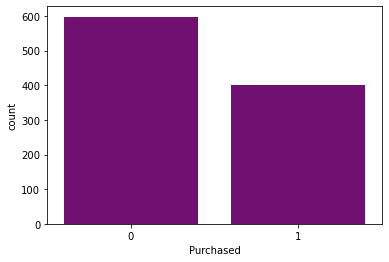

In [18]:
plt = sns.countplot(df['Purchased'], color = 'Purple')

In [21]:
scalar=StandardScaler()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_=df.drop('User ID',axis=1)
X=X_.iloc[:,:-1]
y=df.iloc[:,-1]

In [27]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.96      0.72       189
           1       0.46      0.04      0.08       141

    accuracy                           0.57       330
   macro avg       0.52      0.50      0.40       330
weighted avg       0.53      0.57      0.45       330



In [33]:
confusion_matrix(y_test,y_pred)

array([[182,   7],
       [135,   6]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix')

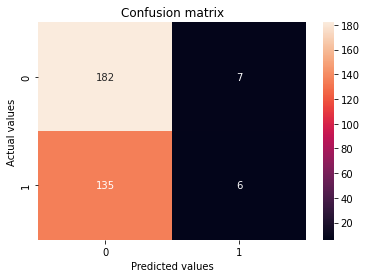

In [32]:
conf=confusion_matrix(y_test,y_pred)
conf=sns.heatmap(conf,annot=True,fmt='.4g')
conf.set_xlabel("Predicted values")
conf.set_ylabel("Actual values")
conf.set_title("Confusion matrix")